In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df= pd.read_csv('cardekho.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df=df.fillna(0)

In [7]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [9]:
df['owner'].value_counts()

owner
First Owner             5215
Second Owner            2017
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [11]:
df.replace({"owner":{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)
pd.set_option('future.no_silent_downcasting', True)

In [12]:
df['owner'].value_counts()

owner
0    5215
1    2017
2     510
3     160
4       5
Name: count, dtype: int64

In [13]:
df['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: count, dtype: int64

In [14]:
df.replace({"fuel":{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)

In [15]:
df['fuel'].value_counts()

fuel
0    4299
1    3520
2      53
3      35
Name: count, dtype: int64

In [16]:
df['transmission'].value_counts()

transmission
Manual       6866
Automatic    1041
Name: count, dtype: int64

In [17]:
df.replace({"transmission":{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
df['transmission'].value_counts()

transmission
0    6866
1    1041
Name: count, dtype: int64

In [19]:
df['seller_type'].value_counts()

seller_type
Individual          6564
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [20]:
df.replace({"seller_type":{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

In [21]:
df['seller_type'].value_counts()

seller_type
0    6564
1    1107
2     236
Name: count, dtype: int64

In [22]:
print(df['max_power'].dtype)

object


In [23]:
df['max_power'] = df['max_power'].apply(lambda x: float(x) if x != ' ' else 0.0)

In [24]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,0,0,0,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,0,0,3,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,0,0,0,0,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,0,0,0,0,23.57,1396.0,70.00,5.0


In [25]:
x=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']

In [26]:
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,145500,0,0,0,0,23.40,1248.0,74.00,5.0
1,2014,120000,0,0,0,1,21.14,1498.0,103.52,5.0
2,2006,140000,1,0,0,2,17.70,1497.0,78.00,5.0
3,2010,127000,0,0,0,0,23.00,1396.0,90.00,5.0
4,2007,120000,1,0,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,1,0,0,0,18.50,1197.0,82.85,5.0
8124,2007,119000,0,0,0,3,16.80,1493.0,110.00,5.0
8125,2009,120000,0,0,0,0,19.30,1248.0,73.90,5.0
8126,2013,25000,0,0,0,0,23.57,1396.0,70.00,5.0


In [27]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7907, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [29]:
model=LinearRegression()

In [30]:
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_predict1=model.predict(x_train)
R=metrics.r2_score(y_predict1,y_train)
print('R squared Error',R)

R squared Error 0.5008835667303156


<function matplotlib.pyplot.show(close=None, block=None)>

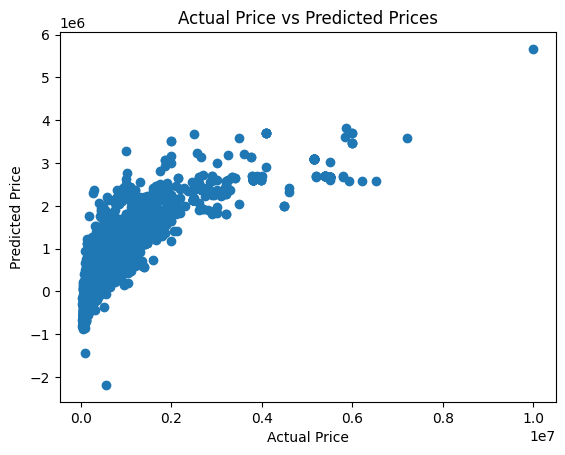

In [32]:
plt.scatter(y_train,y_predict1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show

In [33]:
y_predict=model.predict(x_test)
R=metrics.r2_score(y_predict,y_test)
print('R squared Error',R)

R squared Error 0.4644465245806546


<function matplotlib.pyplot.show(close=None, block=None)>

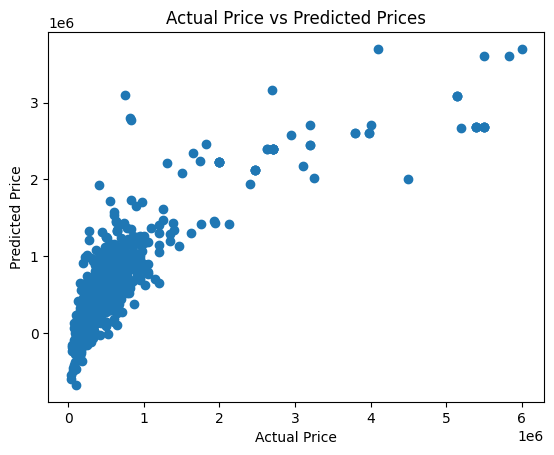

In [34]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show

In [35]:
model2= Lasso()

In [36]:
model2.fit(x_train,y_train)

Lasso()

In [37]:
y_predict1=model2.predict(x_train)
R=metrics.r2_score(y_predict1,y_train)
print('R squared Error',R)

R squared Error 0.5008820032987564


<function matplotlib.pyplot.show(close=None, block=None)>

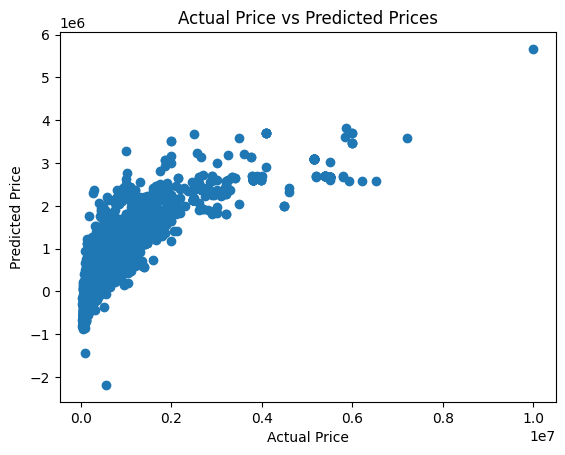

In [38]:
plt.scatter(y_train,y_predict1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show

In [39]:
y_predict=model2.predict(x_test)
R=metrics.r2_score(y_predict,y_test)
print('R squared Error',R)

R squared Error 0.46444377664943526


<function matplotlib.pyplot.show(close=None, block=None)>

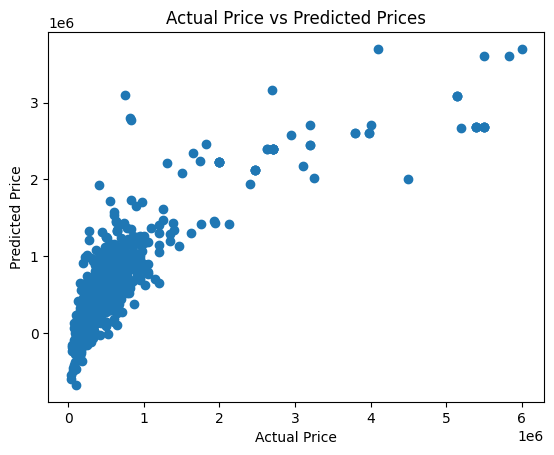

In [40]:
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show